In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from datetime import datetime, date
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from IPython.display import Markdown

sns.set_theme(style="whitegrid")

custom_cmap = LinearSegmentedColormap.from_list('custom_camp', ['#f07167', '#0096c7'], N=100)
custom_cmap2 = LinearSegmentedColormap.from_list('custom_camp2', ['#505484', '#489c9c'], N=100)

colors = ["#0096c7", "#f07167", "#1ac938"]

custom_palette1 = sns.set_palette(sns.color_palette(colors))

colors2 = ['#495084']
cus_col = sns.color_palette(colors2)

title = 'Alumni'

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Data Analysis\\data studi alumni.csv", encoding='utf-8', parse_dates=['TTL'])
df.head(5)

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Lama Studi,IPK
0,60320,Irfan Taufik,Laki-Laki,1988-05-15,Ilmu Komputer,6,3.61
1,1200678,Dendi Handian,Laki-Laki,1994-05-04,Ilmu Komputer,4,3.29
2,56665,Lusi luzaenah,Perempuan,1986-09-12,Ilmu Komputer,"4,5",3.03
3,1203524,Siswo Handoko,Laki-Laki,1994-01-20,Ilmu Komputer,5,2.93
4,907018,Andiyangita Widiagani,Laki-Laki,1992-07-29,Ilmu Komputer,"5,5",2.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   NIM            500 non-null    int64         
 1   Nama           500 non-null    object        
 2   Jenis Kelamin  500 non-null    object        
 3   TTL            500 non-null    datetime64[ns]
 4   Program Studi  500 non-null    object        
 5   Lama Studi     500 non-null    object        
 6   IPK            500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
df.isnull().sum()

NIM              0
Nama             0
Jenis Kelamin    0
TTL              0
Program Studi    0
Lama Studi       0
IPK              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['TTL'] = pd.to_datetime(df['TTL'], infer_datetime_format=True)
now = pd.Timestamp('now')
df['Usia'] = (now.year - df['TTL'].dt.year) - ((now.month - df['TTL'].dt.month) < 0)
df = df.drop('TTL', axis=1)
df.head(5)

,NIM,Nama,Jenis Kelamin,Program Studi,Lama Studi,IPK,Usia
0,60320,Irfan Taufik,Laki-Laki,Ilmu Komputer,6,3.61,34
1,1200678,Dendi Handian,Laki-Laki,Ilmu Komputer,4,3.29,28
2,56665,Lusi luzaenah,Perempuan,Ilmu Komputer,"4,5",3.03,36
3,1203524,Siswo Handoko,Laki-Laki,Ilmu Komputer,5,2.93,28
4,907018,Andiyangita Widiagani,Laki-Laki,Ilmu Komputer,"5,5",2.99,30


In [7]:
x = 'Gender'
y = 'Program Studi'

Markdown("""
# Jumlah {unit} Berdasarkan {x} dan {y}
""".format(unit=title, x=x, y=y))


# Jumlah Alumni Berdasarkan Gender dan Program Studi


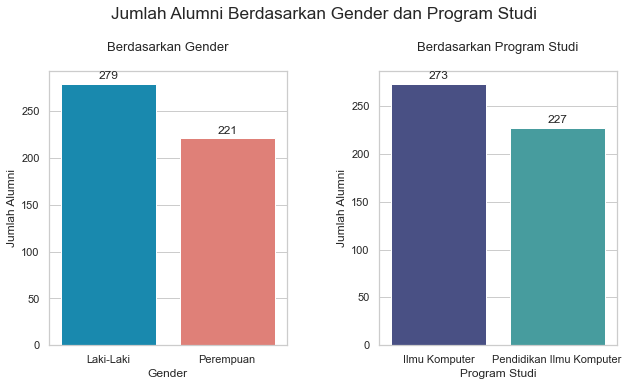

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5.8))
fig.tight_layout()
fig.tight_layout(pad=5)

x = 'Jenis Kelamin'
y = 'Program Studi'

plt.suptitle(f'Jumlah {title} Berdasarkan Gender dan {y}', fontsize = 'x-large', fontweight = 'normal', y=1)

gender = sns.countplot(x='Jenis Kelamin', data = df, palette=custom_palette1, ax=axes[0])
prodi = sns.countplot(x='Program Studi', data = df, palette="mako", ax=axes[1])

gender.set_title('Berdasarkan Gender',fontweight="normal", size=13, y=1.05)
gender.set_xlabel('Gender', fontsize = 12)
gender.set_ylabel(f'Jumlah {title}')

prodi.set_title(f'Berdasarkan {y}',fontweight="normal", size=13, y=1.05)
prodi.set_xlabel(f'{y}', fontsize = 12)
prodi.set_ylabel(f'Jumlah {title}')


for container in gender.containers:
    gender.bar_label(container, padding=3)
    
for container in prodi.containers:
    prodi.bar_label(container, padding=3)
    
plt.show()

Data di atas menunjukkan bahwa jumlah alumni dengan gender laki-laki lebih banyak daripada almuni dengan gender perempuan. Kemudian jumlah alumni program studi ilmu komputer lebih banyak dari pada program studi pendidikan ilmu komputer.

In [9]:
x = 'Lama Studi'

Markdown("""
# Jumlah {unit} Berdasarkan {x}
""".format(unit=title, x=x))


# Jumlah Alumni Berdasarkan Lama Studi


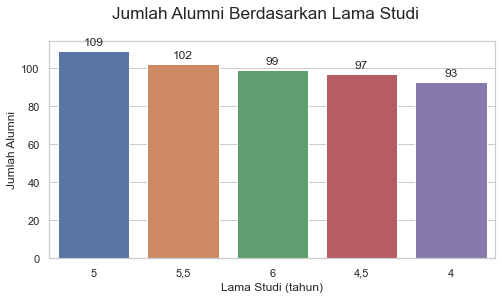

In [10]:
plt.figure(figsize=(8, 4))

y = 'Lama Studi'

g = sns.countplot(x="Lama Studi", data = df, order = df['Lama Studi'].value_counts().index, palette="deep")
g.set(ylabel=f'Jumlah {title}', xlabel=f'{y} (tahun)')
plt.suptitle(f"Jumlah {title} Berdasarkan {y}" , fontsize = 'x-large', fontweight = 'regular', y=1)

for container in g.containers:
    g.bar_label(container, padding=4)

Data di atas menunjukkan bahwa alumni dengan lama studi 5 tahun mendominasi jumlah keseluruhan alumni.

In [11]:
x = 'Gender'
y = 'Program Studi'

Markdown("""
# Distribusi Usia {unit} Berdasarkan {x} dan {y}
""".format(unit=title, x=x, y=y))


# Distribusi Usia Alumni Berdasarkan Gender dan Program Studi


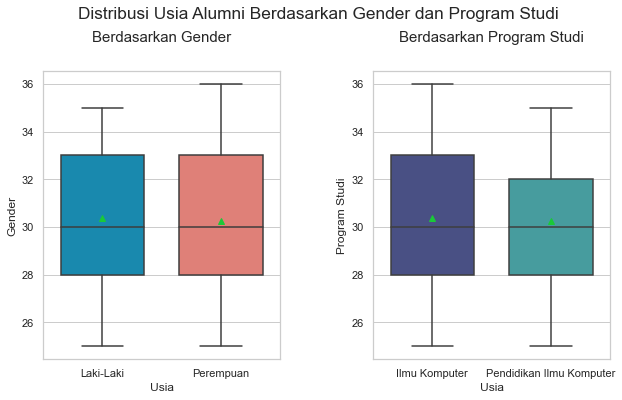

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
fig.tight_layout(pad=5)

x = 'Gender'
y = 'Program Studi'

fig.suptitle(f"Distribusi Usia {title} Berdasarkan {x} dan {y}"
             , fontsize = 'x-large', fontweight = 'normal', y=1)

gender = sns.boxplot(y ='Usia', x = 'Jenis Kelamin', data = df, palette=custom_palette1, width=0.70, showmeans=True, ax=axes[0])
pend_akhir = sns.boxplot(y ='Usia', x = 'Program Studi', data = df, palette='mako', width=0.70, showmeans=True, ax=axes[1])


gender.set_title(f'Berdasarkan {x}',fontweight="normal", size=15, y=1.08)
gender.set_xlabel('Usia', fontsize = 12)
gender.set_ylabel(f'{x}')

pend_akhir.set_title(f'Berdasarkan {y}',fontweight="normal", size=15, y=1.08)
pend_akhir.set_xlabel('Usia', fontsize = 12)
pend_akhir.set_ylabel(f'{y}')

plt.show()

Data di atas menunjukkan bahwa distribusi usia alumni dengan gender laki-laki dan perempuan relatif seimbang. Sedangkan distribusi usia alumni dengan program studi ilmu komputer lebih lebar daripada program studi ilmu komputer.

In [13]:
x = 'Lama Studi'

Markdown("""
# Distribusi Usia {unit} Berdasarkan {x}
""".format(unit=title, x=x))


# Distribusi Usia Alumni Berdasarkan Lama Studi


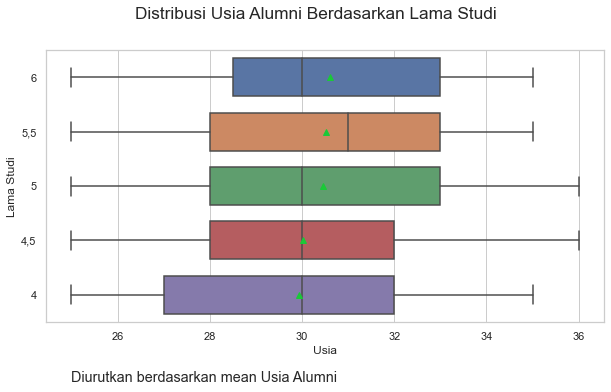

In [14]:
plt.figure(figsize=(10, 5))

var = 'Usia'
x = 'Lama Studi'
# y = 'Program Studi'

df_usia_ls = df.groupby('Lama Studi')["Usia"].mean().reset_index()
df_usia_ls = df_usia_ls.sort_values(by="Usia", ascending=False)

# df_usia_ls.head()

g = sns.boxplot(x ='Usia', y = 'Lama Studi', data = df, palette="deep", order=df_usia_ls['Lama Studi'], width=0.70, showmeans=True)
g.set(xlabel=f'{var}', ylabel=f'{x}')
g.text(25, 5.6, f'Diurutkan berdasarkan mean {var} {title}', fontstyle="normal", fontsize="large")

plt.suptitle(f'Distribusi Usia {title} Berdasarkan {x}', y=1, fontsize = 'x-large', fontweight = 'regular')
plt.show()

Data di atas menunjukkan bahwa rata-rata usia alumni dengan lama studi 6 tahun paling tinggi diantara kategori lainnya. Sebaliknya rata-rata usia alumni dengan lama studi 4 tahun paling rendah. Dengan demikian dapat diketahui bahwa lama studi berbanding lurus dengan usia.

In [15]:
x = 'Gender'
y = 'Program Studi'
var = 'Indeks Prestasi Kumulatif'

Markdown("""
# Distribusi {var} {unit} Berdasarkan {x} dan {y}
""".format(unit=title, var=var, x=x, y=y))


# Distribusi Indeks Prestasi Kumulatif Alumni Berdasarkan Gender dan Program Studi


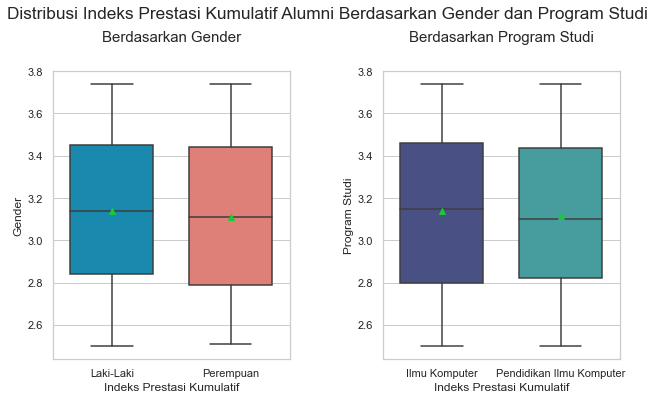

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
fig.tight_layout(pad=5)

var = 'Indeks Prestasi Kumulatif'
x = 'Gender'
y = 'Program Studi'

fig.suptitle(f"Distribusi {var} {title} Berdasarkan {x} dan {y}"
             , fontsize = 'x-large', fontweight = 'normal', y=1)

gender = sns.boxplot(y ='IPK', x = 'Jenis Kelamin', data = df, palette=custom_palette1, width=0.70, showmeans=True, ax=axes[0])
pend_akhir = sns.boxplot(y ='IPK', x = 'Program Studi', data = df, palette='mako', width=0.70, showmeans=True, ax=axes[1])


gender.set_title(f'Berdasarkan {x}',fontweight="normal", size=15, y=1.08)
gender.set_xlabel(f'{var}', fontsize = 12)
gender.set_ylabel(f'{x}')

pend_akhir.set_title(f'Berdasarkan {y}',fontweight="normal", size=15, y=1.08)
pend_akhir.set_xlabel(f'{var}', fontsize = 12)
pend_akhir.set_ylabel(f'{y}')

plt.show()

Data di atas menunjukkan distribusi IPK berdasarkan gender dan program studi. Distribusi kedua kategori ini relatif seimbang dengan rata-rata IPK alumni pada angka 3 sd. 3.2

In [17]:
x = 'Lama Studi'
var = 'Indeks Prestasi Kumulatif'

Markdown("""
# Distribusi {var} {unit} Berdasarkan {x}
""".format(unit=title, var=var, x=x))


# Distribusi Indeks Prestasi Kumulatif Alumni Berdasarkan Lama Studi


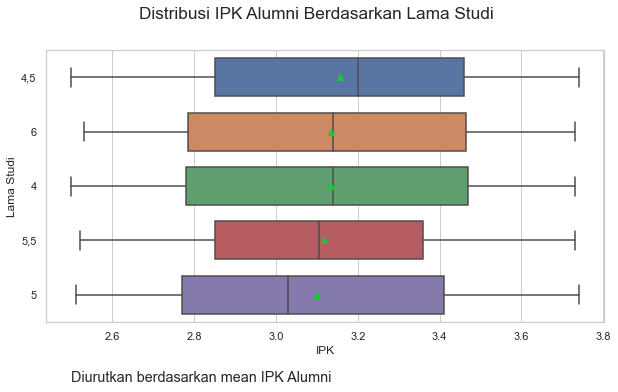

In [18]:
plt.figure(figsize=(10, 5))

var = 'IPK'
x = 'Lama Studi'
# y = 'Program Studi'

df_usia_ls = df.groupby('Lama Studi')["IPK"].mean().reset_index()
df_usia_ls = df_usia_ls.sort_values(by="IPK", ascending=False)

# df_usia_ls.head()

g = sns.boxplot(x ='IPK', y = 'Lama Studi', data = df, palette="deep", order=df_usia_ls['Lama Studi'], width=0.70, showmeans=True)
g.set(xlabel=f'{var}', ylabel=f'{x}')
g.text(2.5, 5.6, f'Diurutkan berdasarkan mean {var} {title}', fontstyle="normal", fontsize="large")

plt.suptitle(f'Distribusi {var} {title} Berdasarkan {x}', y=1, fontsize = 'x-large', fontweight = 'regular')
plt.show()

Data di atas menunjukkan distribusi rata-rata IPK alumni berdasarkan lama studi. Dapat diketahui bahwa almuni dengan lama studi 4,5 tahun memiliki rata-rata IPK lebih tinggi daripada kategori lama studi lainnya.

In [19]:
x = 'Rata-rata IPK'
var = 'Program Studi'

Markdown("""
# {var} Teratas Berdasarkan {x}
""".format(var=var, x=x))


# Program Studi Teratas Berdasarkan Rata-rata IPK


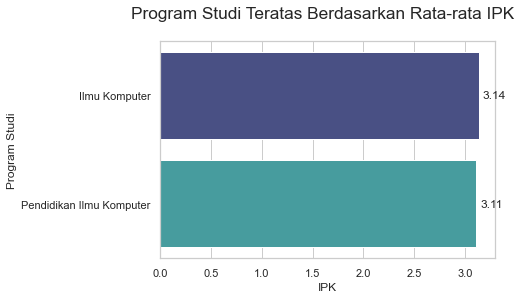

In [20]:
plt.figure(figsize=(6, 4))

var = 'Program Studi'
x = 'Rata-rata IPK'

df_ls = df.groupby('Program Studi')["IPK"].mean().reset_index()
df_ls = df_ls.sort_values(by="IPK", ascending=False)

prodi_ipk = sns.barplot(x='IPK', y='Program Studi', data = df_ls, palette="mako")

plt.suptitle(f'{var} Teratas Berdasarkan {x}', y=1, fontsize = 'x-large', fontweight = 'regular')
for container in prodi_ipk.containers:
    prodi_ipk.bar_label(container, padding=4, fmt='%.2f')
plt.show()

Data di atas menunjukkan bahwa almuni dengan program studi ilmu komputer memiliki rata-rata IPK diatas program studi pendidikan ilmu komputer yaitu diangka 3.14, dengan selisih 0.3 jika dibandingkan dengan program studi pendidikan ilmu komputer.

In [21]:
# x = 'IPK'
var = 'Indeks Prestasi Kumulatif'

Markdown("""
# Lima {unit} Teratas Berdasarkan {var}
""".format(unit=title, var=var))


# Lima Alumni Teratas Berdasarkan Indeks Prestasi Kumulatif


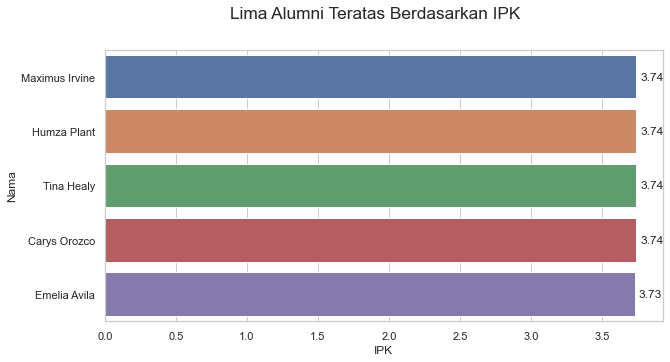

In [22]:
top_alumni_ipk = df.sort_values(by="IPK", ascending=False).head(5)
top_alumni_ipk.head(10)

plt.figure(figsize=(10, 5))

top_ipk = sns.barplot(x='IPK', y='Nama', data = top_alumni_ipk, palette="deep")

plt.suptitle(f"Lima {title} Teratas Berdasarkan IPK", fontsize = 'x-large', fontweight = 'regular', y=1)

for container in top_ipk.containers:
    top_ipk.bar_label(container, padding=4)

Data di atas menunjukkan lima almuni teratas berdasarkan IPK